# [K-beauty US Amazon Strategy]

# Amazon K-beauty item & review Dataset

## PART 1: Data Preprocessing

### Import library & Load Data

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import datetime
from datetime import datetime, timedelta
import re
import string

# 텍스트 데이터를 위한 라이브러리
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler

# 언어 감지 및 번역을 위한 라이브러리: langdetect 간편하게 사용할 수 있어서 선택, 
# Fasttext는 사전 학습된 모델을 다운 받아야 해서 미사용
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from deep_translator import GoogleTranslator

# 바이그램 및 트리그램을 위한 라이브러리
from nltk.util import ngrams
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from collections import Counter

# 팔레트 색상 테스트를 위한 라이브러리
from matplotlib.colors import LinearSegmentedColormap
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from wordcloud import WordCloud

# TF-IDF를 위한 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer

# 감성분석을 위한 라이브러리
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# LDA 및 토픽 모델링을 위한 라이브러리
import gensim
from gensim.utils import simple_preprocess
# import gensim.corpora as corpora
from gensim import corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis

# 틱톡커 추천을 위한 라이브러리
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

CWD = os.getcwd()
DATA_PATH = "./dataset/"
print("현재 경로: ", CWD)

# pandas csv 읽어오는 함수
def load_data(data_path, file):
    path = os.path.join(data_path, file)
    return pd.read_csv(path)

데이터셋 읽어오기
dr_items = load_data(DATA_PATH,'Dr_jart_items.csv')
dr_reviews = load_data(DATA_PATH,'Dr_jart_reviews.csv')
cs_items = load_data(DATA_PATH,'cosrx_items.csv')
cs_reviews = load_data(DATA_PATH,'cosrx_reviews.csv')
if_items = load_data(DATA_PATH,'imfrom_items.csv')
if_reviews = load_data(DATA_PATH,'imfrom_reviews.csv')
bj_items = load_data(DATA_PATH,'joseon_items.csv')
bj_reviews = load_data(DATA_PATH,'joseon_reviews.csv')
pu_items = load_data(DATA_PATH,'purito_items.csv')
pu_reviews = load_data(DATA_PATH,'purito_reviews.csv')
skinsort = load_data(DATA_PATH,'skinsort_0115.csv')

### Crawling(Amazon, Tiktok)
크롤링 코드는 따로 정리 및 통합

### Load data(Local)

In [ ]:
# # Local로 데이터 불러오기(필요시 주석 제거 후 실행)
# # 데이터셋 불러오기
# dr_items = pd.read_csv('Dr_jart_items.csv')
# dr_reviews = pd.read_csv('Dr_jart_reviews.csv')
# cs_items = pd.read_csv('cosrx_items.csv')
# cs_reviews = pd.read_csv('cosrx_reviews.csv')
# if_items = pd.read_csv('imfrom_items.csv')
# if_reviews = pd.read_csv('imfrom_reviews.csv')
# bj_items = pd.read_csv('joseon_items.csv')
# bj_reviews = pd.read_csv('joseon_reviews.csv')
# pu_items = pd.read_csv('purito_items.csv')
# pu_reviews = pd.read_csv('purito_reviews.csv')
# skinsort = pd.read_csv('skinsort_0115.csv')

### Data Overview

In [ ]:
# 전체적인 데이터 정보 EDA
def eda_overveiw(df):

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    print(f"\n=================== DATA OVERVIEW ===================")

    # 데이터 상단부 확인
    print("\n----------------- Head -----------------")
    print(df.head())
    print("=" * 60)

    # 데이터 정보 및 크기 확인
    print("\n--------------- Information ---------------")
    print(df.info())
    print(f"\nSize: {df.size}")
    print(f"Shape: {df.shape}")
    print("=" * 60)

    # 결측치 확인
    print("\n--------------- Missing Values ---------------")
    print(df.isnull().sum())
    print("=" * 60)

    # 중복값 확인
    print("\n--------------- Duplicate Values ---------------")
    print(df.duplicated().value_counts())
    print("=" * 60)

    # 데이터 기술통계량 확인 (int, float type)
    print("\n------------ Descriptive Statistics (Numeric) ------------")
    print(df.describe())
    print("=" * 60)

    # 데이터 기술통계량 확인 (object type)
    print("\n------------ Descriptive Statistics (Categorical) ------------")

    try:
        print(df.describe(include=[object]))

    except:
        object_cols = df.select_dtypes(include=['object']).columns
        error_cols = []

        for col in object_cols:
            if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
                error_cols.append(col)
        print(f"{error_cols} Excluded")
        print(df.loc[:, ~df.columns.isin(error_cols)].describe(include=[object]))

    print("=" * 60)

eda_overveiw(dr_items)


=================== DATA OVERVIEW ===================

----------------- Head -----------------
         ASIN                                              title  order  \
0  B07DR5816K  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   
1  B07GTMPYSG  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   
2  B081SRDRD7  Dr.Jart+ Cryo Rubber Brightening Face Mask | K...      6   
3  B081SRSNWW  Dr.Jart+ Cryo Rubber Face Mask with Moisturizi...      2   
4  B084Z4W4PK  Dr.Jart+ Dermask Micro Jet Brightening Solutio...     27   

             category     brand  price  global_rating_count  \
0              Makeup  Dr.Jart+   54.0                 3367   
1  Skin Care Products  Dr.Jart+   25.0                 3367   
2  Skin Care Products  Dr.Jart+   16.0                   77   
3  Skin Care Products  Dr.Jart+   16.0                  373   
4  Skin Care Products  Dr.Jart+   10.0                   37   

                                         description  \
0  {"Benefits": "

### Data Cleaning

#### Copied Dataset

In [ ]:
# 분석 & 전처리용으로 원본 데이터 복사
dr_items_copy = dr_items.copy()
dr_reviews_copy = dr_reviews.copy()
cs_items_copy = cs_items.copy()
cs_reviews_copy = cs_reviews.copy()
if_items_copy = if_items.copy()
if_reviews_copy = if_reviews.copy()
bj_items_copy = bj_items.copy()
bj_reviews_copy = bj_reviews.copy()
pu_items_copy = pu_items.copy()
pu_reviews_copy = pu_reviews.copy()
skinsort_copy = skinsort.copy()

#### Handling Missing Values

In [ ]:
# 'brand'가 없거나 다른 데이터 확인 -> 각 파일마다 다르게 정리 필요
# 이유 - 브랜드별 아이템만 추출했기 때문 + 세부사항에 브랜드명 작성되어 있으니 그것보고 판단

# 브랜드 명 변경
dr_items_copy['brand'].replace('No brand', 'Dr.Jart+', inplace=True)
cs_items_copy['brand'].replace('No brand', 'COSRX', inplace=True)
bj_items_copy['brand'].replace('No brand', 'Beauty of Joseon', inplace=True)
if_items_copy['brand'].replace('No brand', "I'm from", inplace=True)
pu_items_copy['brand'].replace('No brand', 'PURITO', inplace=True)

In [ ]:
# items_df들의 컬럼 수정을 위해 df를 list에 포함시키기
items_list = [dr_items_copy, cs_items_copy, bj_items_copy, if_items_copy, pu_items_copy]

# reviews_df들의 컬럼 수정을 위해 df를 list에 포함시키기
reviews_list = [dr_reviews_copy, cs_reviews_copy, bj_reviews_copy, if_reviews_copy, pu_reviews_copy]

# items_df들의 결측치를 NaN 값으로 대체 함수
def preprocess_items(df_items):
    df_items['best_sellers_rank_Feature'].replace('No result', np.nan, inplace=True)
    df_items['global_rating_count'].replace('No rating', np.nan, inplace=True)
    df_items['Special_Feature'].replace('No special feature', np.nan, inplace=True)

# reviews_df들의 결측치를 NaN 값으로 대체 함수
def preprocess_reviews(df_reviews):
    df_reviews['date'].replace('No date', np.nan, inplace=True)
    df_reviews['review_rating'].replace('No review', np.nan, inplace=True)

# review_df : reivew content 결측치 제거 함수
def dropna_reviews(reviews_df):
    reviews_df.dropna(inplace=True)
    reviews_df.reset_index(inplace=True)
    
# items_df 결측치 제거    
for i in range(len(items_list)):
    preprocess_items(items_list[i])   

# reviews_df 결측치 값 대체 후 체거
for i in range(len(reviews_list)):
    preprocess_reviews(reviews_list[i])
    dropna_reviews(reviews_list[i])
    

# 카테고리별 EDA를 진행하기 위한 아이템 데이터셋 생성
amazon_items_df = pd.concat([dr_items_copy, cs_items_copy, if_items_copy, bj_items_copy, pu_items_copy])

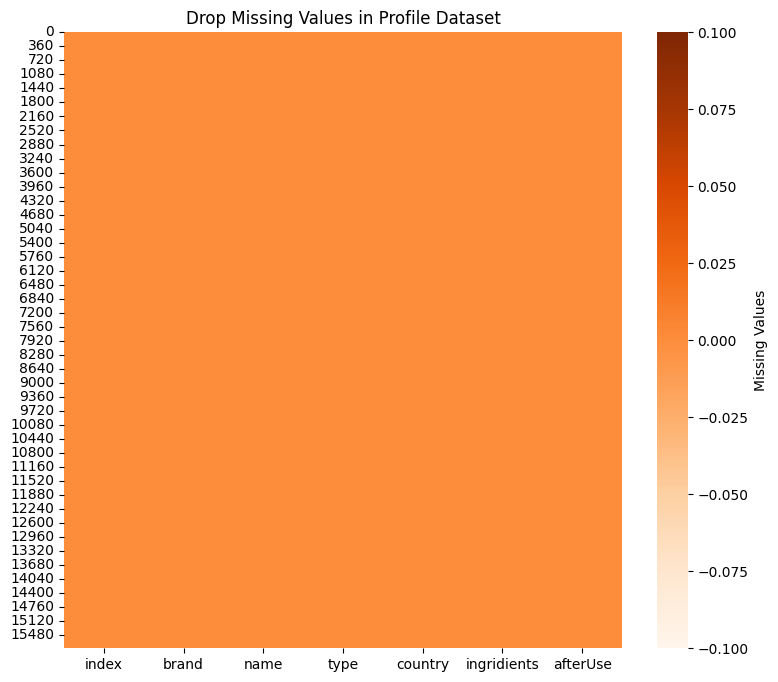

In [ ]:
# skinsort 결측치 처리 및 확인
skinsort_copy.dropna(subset=['country','afterUse', 'type'], inplace=True)
skinsort_copy.reset_index(inplace=True)

# 결측치 삭제 확인 시각화
plt.close()
plt.figure(figsize=(9,8))
sns.heatmap(skinsort_copy.isnull(), cbar_kws={'label':'Missing Values'}, cmap='Oranges')
plt.title('Drop Missing Values in Profile Dataset')
plt.show()

#### Column-wise data transformation

In [ ]:
# df_items : description 컬럼
def preprocess_description(df_items):

    for i in range(len(df_items)):
        description = ast.literal_eval(df_items.description[i])

        for key, value in description.items():
            if key not in df_items.columns:
                df_items[key] = np.nan
            df_items.loc[i, key] = value

    df_items.drop(columns=['description'], inplace=True)

# df_items : detail_dict 컬럼
def preprocess_detail_dict(df_items):

    for i in range(len(df_items)):
        detail_dict = ast.literal_eval(df_items.detail_dict[i])

        for key, value in detail_dict.items():
            if key not in df_items.columns:
                df_items[key] = np.nan
            df_items.loc[i, key] = value

    df_items.drop(columns=['detail_dict'], inplace=True)

# df_items : best_sellers_rank_Feature 컬럼을 세부 컬럼으로 나누기
def preprocess_best_sellers_col(df_items):

        for i in range(len(df_items)):
            try:
                value = df_items.best_sellers_rank_Feature[i]

                if pd.isna(value): #np.nan 인 애들
                    # print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                    continue

                if isinstance(value, float): # float 타입인 애들
                    value = str(value)
                    print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")

                cat_list = df_items.best_sellers_rank_Feature[i].split('#')

                df_items.loc[i, 'Category'] = cat_list[1]
                df_items.loc[i, 'Sub_Category'] = cat_list[2]

                detail_list = df_items.Category[i].split('in')

                df_items.loc[i, 'Category_Rank']= detail_list[0]
                df_items.loc[i, 'Category_Name']= detail_list[1]

                df_items.loc[i, 'Category_Name'] = df_items.Category_Name[i].split('(')[0]

                sub_list = df_items.Sub_Category[i].split('in')

                df_items.loc[i, 'Sub_Category_Rank']= sub_list[0]
                df_items.loc[i, 'Sub_Category_Name']= sub_list[1]

            except Exception as e:
                print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                print(f"Error: {e}")

                continue

        df_items.drop(columns=['best_sellers_rank_Feature'], inplace=True)

# df_items들의 칼럼 수정 한번에 진행
for i in range(len(items_list)) :
    preprocess_description(items_list[i])
    preprocess_detail_dict(items_list[i])
    preprocess_best_sellers_col(items_list[i])

In [ ]:
# df_reviews : date, rating 컬럼
def preprocess_review_cols(df_reviews):

    for i in range(len(df_reviews)):

        try:

            if pd.isna(df_reviews.date[i]) or 'on' not in df_reviews.date[i]:
                # print(f"{i}, {df_reviews.date[i]} Passed")
                continue
            else:
                df_reviews.loc[i, 'review_date'] = df_reviews.date[i].split('on')[1]
                df_reviews.loc[i, 'review_date'] = pd.to_datetime(df_reviews.review_date[i])

            if pd.isna(df_reviews.review_rating[i]):
                print(f"{i}, {df_reviews.review_rating[i]} Passed")
                continue
            else:
                df_reviews.loc[i, 'review_rating'] = float(df_reviews.review_rating[i].split('out')[0])
        except Exception as e:
            print(f"{i}, {df_reviews.review_rating[i]}, Error: {e}")
            continue

# df_items들의 컬럼 한번에 수정하기: 'review_date'를 날짜 형식으로 변경, review_rating을 정수형으로 변경
for i in range(len(reviews_list)) :
    preprocess_review_cols(reviews_list[i])
    reviews_list[i]['review_date'] = pd.to_datetime(reviews_list[i]['review_date'])
    reviews_list[i].drop(columns=['date'], inplace=True)
    reviews_list[i]['review_rating'] = pd.to_numeric(reviews_list[i]['review_rating'], errors='coerce', downcast='integer')

In [ ]:
# 브랜드별 item, review 데이터 merge 결합
dr_df = pd.merge(dr_items_copy, dr_reviews_copy, on='ASIN')
cs_df = pd.merge(cs_items_copy, cs_reviews_copy, on='ASIN')
if_df = pd.merge(if_items_copy, if_reviews_copy, on='ASIN')
bj_df = pd.merge(bj_items_copy, bj_reviews_copy, on='ASIN')
pu_df = pd.merge(pu_items_copy, pu_reviews_copy, on='ASIN')

merge_list = [dr_df, cs_df, if_df, bj_df, pu_df]

In [ ]:
 # 컬럼 분류 코드
 def preprocess_merge_df(merge_df):

    # 컬럼명 변경, 불필요 컬럼 삭제, 인덱스 수정, 결측치 확인
    merge_df.rename(columns={'content':'review_content', 'title_x':'title'}, inplace=True)
    merge_df.drop(['title_y'], axis=1, inplace=True)
    merge_df.reset_index(drop=True, inplace=True)
    merge_df.isnull().sum()

    # Category_Rank
    merge_df['Category_Rank'] = merge_df['Category_Rank'].apply(
        lambda x: str(x).replace(',', '') if not pd.isna(x) and isinstance(x, float) else x
    ).astype('str').apply(lambda x: x.replace(',', '') if x != 'nan' else None)

    # Sub_Category_Rank
    merge_df['Sub_Category_Rank'] = merge_df['Sub_Category_Rank'].apply(
        lambda x: str(x).replace(',', '') if not pd.isna(x) and isinstance(x, float) else x
    ).astype('str').apply(lambda x: x.replace(',', '') if x != 'nan' else None)

    # review_rating
    merge_df['review_rating'] = merge_df['review_rating'].apply(
        lambda x: str(x) if not pd.isna(x) and isinstance(x, float) else x
    ).astype('float', errors='ignore')

    # review_date
    merge_df['review_date'] = merge_df['review_date'].apply(
        lambda x: pd.to_datetime(x) if not pd.isna(x) else None
    )

    merge_df.reset_index(drop=True, inplace=True)

    merge_df.info()
    merge_df.head(2)

# 언어 감지 함수
def detect_language(text):

    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# 영어가 아닌 언어를 구글번역을 활용하여 영어로 번역
def translate_en(text):

    to_translate = text
    translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

    return translated

def text_preprocessing(merge_df) :

    # str 형식이 아닐 경우 오류 방지를 위한 코드
    merge_df['review_content'] = merge_df['review_content'].fillna('').astype(str)

    # 리뷰 언어가 영어가 아닌 경우 -> 번역
    #merge_df['detected_language'] = merge_df['review_content'].apply(detect_language)
    merge_df['detected_language'] = merge_df['review_content'].apply(lambda x: detect_language(x) if isinstance(x, str) else None)

    merge_df.loc[merge_df['detected_language'] != 'en', 'review_content'] = merge_df.loc[merge_df['detected_language'] != 'en', 'review_content'].apply(translate_en)

    # merge_df.to_csv(DATA_PATH + "amazon_koreaOnly_translated.csv", encoding='utf-8')
    merge_df.rename(columns={'category':'Amazon_Category'}, inplace=True)
    merge_df['review_date'] = merge_df['review_date'].apply(lambda x: pd.to_datetime(x) if not pd.isna(x) else None)
    merge_df['global_rating_count'] = merge_df['global_rating_count'].astype('Int64')
    merge_df['Category_Rank'] = merge_df['Category_Rank'].astype('Int64')
    merge_df['Sub_Category_Rank'] = merge_df['Sub_Category_Rank'].astype('Int64')

    print(merge_df.head(2))

# 브랜드 별 아이템, 리뷰 데이터 merge로 결합 후 리뷰데이터 번역 진행
# 시간이 다소 소요
for i in range(len(merge_list)):
    preprocess_merge_df(merge_list[i])
    text_preprocessing(merge_list[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ASIN                             1771 non-null   object        
 1   title                            1771 non-null   object        
 2   order                            1771 non-null   int64         
 3   category                         1771 non-null   object        
 4   brand                            1771 non-null   object        
 5   price                            1771 non-null   float64       
 6   global_rating_count              1771 non-null   int64         
 7   Special_Feature                  705 non-null    object        
 8   total_star_mean                  1771 non-null   float64       
 9   Benefits                         1771 non-null   object        
 10  Description                      1771 non-null   object     

In [ ]:
# 스킨쏘트 - 브랜드별 성분, 사용후효과 컬럼럼
def preprocess_skinsort_col(text):
    spaced_text = re.sub(r',(?!\s)', ', ', text)  # , 뒤에 공백이 없으면 추가
    return spaced_text

skinsort_copy['ingridients'] = skinsort_copy['ingridients'].apply(preprocess_skinsort_col)
skinsort_copy['afterUse'] = skinsort_copy['afterUse'].apply(preprocess_skinsort_col)

In [ ]:
# 데이터 결합
amazon_df = pd.concat([dr_df, cs_df, if_df, bj_df, pu_df])

#### 텍스트 전처리

In [ ]:
# nltk 에서 Punkt tokenizer & stopwords list를 다운로드
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# 텍스트 불용어 처리
lemmatizer = WordNetLemmatizer()

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# 불용어 하나로 합치기
one_stopwords = [
"would", "use", "using","locals", "cf", "fb", "ba" , "line", "lines","formula", "formulas", "collection", "collections",
"really","skin","used","time", "makes","tried","one","skin feel","lot","trying","buy","apply","quite","way","never","bought", "cosrx","always","less",
"without","absolutely","might","maybe","sure","think","though", "getting","result","know", "especially","dr jart","feel","purchase","definitely",
"im","thing","started","need","another","noticed","actually", "people","got","box","every","found","jart","wear",
"set", "sets", "value", "values", "pack", "packs","new","ive", "and", "beauty", "skincare", "cosmetics", "product", "products", "from","for","im","i'm","floz",
"care", "makeup", "mask", "sheet","best", "top", "favorite","amazing", "perfect", "brand", "brands", "item", "items", "category", "categories", "ingredient", "ingredients",
"set", "sets", "value", "values", "pack", "packs","latest", "exclusive", "limited","special", "popular", "quality", "For","safe", "worked", "works", " product"
"face", "stuff","joseon", "dont","want","type","facial","money","nan","1","no","non","not", "drjart","to", "From" , "drjrt", "types", "of", "100ml","200ml","300ml","150ml","250ml",
"50ml","30ml", "338","507","676","purito","dr", "12", "100", "5", '35', '•', '50', 'became', 'become', 'id', 'tag', 'film', 'ski', 'try', 'bag', 'ml', 'fl', 'oz', 'youre',
'’', '”', 'skin', 'product', 'like', 'get', 'work',  'many', 'first', 'subject', 're', 'edu','object','generator','genexpr', 'much', 'little','bit','also','even', 'see','super','make','made','go',
'put','still','come','say','give','leave','keep','far','however','year','overall','left','take','highly','area','almost','two','could','breakout','break',
'fat','right','2','minute','seems','around','time','going','away','cause','leaving','nothing','back','ever','already','yet','star','part','liked','came',
'give','second','side','may','reaction','usually','3','next','full','job','looked','making','review','seem','big','kind','get','either',
'buying','thing','stay','said','hour','fan','jar','plus','add','“','gave','ordered','went','caused','others','point','twice','thats','added','end','someone',
'took','gone','let','anyone','amazon','order','able','seen','10','saw','else','one','burn','ill','test','fact','gon', 'coverage', 'cast', 'broke', 'quickly', 'bump', 'match',
'month', 'week', 'version', 'better', 'loved', 'holy', 'ok', 'prone', 'quickly', 'seoul', 'look', 'minute', 'amount', 'u', 'thought', 'korean', 'couple', 
'strong', 'cap', 'open', 'us', 'wife', 'unfortunately', 'everything', 'break', 'easily', 'puffiness', 'received', 'last', 'must', 'result', 'finish',
'list', 'inside', 'return', 'broken', 'mark', '21', 'star', 'opened', 'picture', 'waste', 'tret', 'sister', 'out', 'among', 'react', 'working', 'terribly', 'inci',
'patch', 'timeless', 'bump', 'one', 'theyre', 'combo', 'immediately', 'update', 'butter', 'problem', 'ratio', 'refill', 'interesting', 'label', 'whole', 'wave', 'nice', 'love', 'korea',
'expiration', 'date', 'english', 'pleased', 'sample', 'gift', '4',  'l', 'co', 'felt', '5m', 'leaves', 'feeling', 'good', 'great', 'doesnt', 'happy', 'well', 'results', 'didnt', 'happy',
"I'm","i've","it's", 'it’s', 'i’m', 'It’s', 'I’m', "I've", "i’ve", "I’ve", 'i’d', 'don’t', 'can’t', 'didn’t', 'doesn’t', 'won’t', 'isn’t', 'aren’t', 'wasn’t', 'weren’t', 'hasn’t', 'haven’t', 'hadn’t', 'shouldn’t',
'i’ll', 'that’s', 'goes', 'wanted', 'arrived', 'pleasant', 'stars', 'purchased', 'looks', 'times', 'minutes', 'comes', 'feels', 'feel', 'felt', 'loves', 'there’s', 'jarts', 'looking', 'indeed', 'shouldnt', 'timer', 'guess', 'chose', 'blood', 
'intrigues', 'occassionly', 'sometimes', 'wants', 'ball', 'decently', 'afterwards', 'flare', 'please', 'setting', 'extremely', 'older', 'taste', 'australian', 'true', 'purple', 'sooooooo', 'years', 'weeks', 'beach', 'tell', 'cant', 'taking', 'holds', 
'usual', 'gonna', 'yay', 'teddy', 'along', 'somewhat', 'youve', 'idk', 'penny', 'couldnt', 'itll', 'husband', 'vera', 'gotten', 'corsx', 'ones', 'forever', 'havent', 'per', 'forward', 'upset', 'laneige', 'previously', 'whats', 'says', 
'send', 'least', 'soooo', 'cannot', 'bay', 'soooooooo', 'isnt', 'since', 'ground', 'cant', '100100', 'yuka', 'wanna', 'pic', '1010', 'soooo', 'unpleasant', 'you’ve', 'fuu', 'sent', 'theres', 'coming', 'skinfix', 'cetaphil', 'missha', 'wouldn’t', 'call', 'yes', 'dhc', 'outs',
'bareminerals', 'wow', 'skii', 'florida', 'bye', 'tackles', 'haha', 'wasnt'
]


stop_words = stopwords.words('english')
stop_words.extend(one_stopwords)


# 텍스트 전처리
def clean_text(text):
    if isinstance(text, str):

        # 소문자로 모두 변환
        text = text.lower()

        # URL 제거
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # 마크다운 스타일 링크 제거
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # @ 제거
        text = re.sub(r'@\w+', '', text)

        # 구두점, 특수문자 제거
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# 텍스트 토큰화
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# 불용어 제거
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# (기존) stemming
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

# (추가) -> lemmatization 함수로 변경
def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return tokens

# 저장
amazon_df['cleaned_title'] = amazon_df['title'].apply(clean_text)
amazon_df['cleaned_review'] = amazon_df['review_content'].apply(clean_text)
skinsort_copy['cleaned_ingridients'] = skinsort_copy['ingridients'].apply(clean_text)
skinsort_copy['cleaned_afterUse'] = skinsort_copy['afterUse'].apply(clean_text)

amazon_df['tokenized_title'] = amazon_df['cleaned_title'].apply(tokenize_text)
amazon_df['tokenized_review'] = amazon_df['cleaned_review'].apply(tokenize_text)
skinsort_copy['tokenized_ingridients'] = skinsort_copy['cleaned_ingridients'].apply(tokenize_text)
skinsort_copy['tokenized_afterUse'] = skinsort_copy['cleaned_afterUse'].apply(tokenize_text)

amazon_df['stemmed_title'] = amazon_df['tokenized_title'].apply(stem_tokens)
amazon_df['stemmed_review'] = amazon_df['tokenized_review'].apply(stem_tokens)
skinsort_copy['stemmed_ingridients'] = skinsort_copy['tokenized_ingridients'].apply(stem_tokens)
skinsort_copy['stemmed_afterUse'] = skinsort_copy['tokenized_afterUse'].apply(stem_tokens)

amazon_df['stpw_processed_title'] = amazon_df['tokenized_title'].apply(remove_stopwords)
amazon_df['stpw_processed_review'] = amazon_df['tokenized_review'].apply(remove_stopwords)
skinsort_copy['stpw_processed_ingridients'] = skinsort_copy['tokenized_ingridients'].apply(remove_stopwords)
skinsort_copy['stpw_processed_afterUse'] = skinsort_copy['tokenized_afterUse'].apply(remove_stopwords)

# bigram 하기 전
amazon_df['lemmatized_title'] = amazon_df['stpw_processed_title'].apply(lemmatize_tokens)
amazon_df['lemmatized_review'] = amazon_df['stpw_processed_review'].apply(lemmatize_tokens)
skinsort_copy['lemmatized_ingridients'] = skinsort_copy['stpw_processed_ingridients'].apply(lemmatize_tokens)
skinsort_copy['lemmatized_afterUse'] = skinsort_copy['stpw_processed_afterUse'].apply(lemmatize_tokens)

amazon_df.head(2)

,ASIN,title,order,Amazon_Category,brand,price,global_rating_count,Special_Feature,total_star_mean,Benefits,Description,Suggested use,Manufacturer,Country of Origin,Item model number,Product Dimensions,Is Discontinued By Manufacturer,UPC,Language,Category,Sub_Category,Category_Rank,Category_Name,Sub_Category_Rank,Sub_Category_Name,index,review_num,customer_id,customer_name,review_rating,review_content,review_date,detected_language,Ingredients,Manufacturer recommended age,Date First Available,Batteries,Department,Package Dimensions,is_bundle,cleaned_title,cleaned_review,tokenized_title,tokenized_review,stemmed_title,stemmed_review,stpw_processed_title,stpw_processed_review,lemmatized_title,lemmatized_review
0,B07DR5816K,Dr.Jart+ Cicapair Tiger Grass Color Correcting...,1,Makeup,Dr.Jart+,54.0,3367,Redness relief,4.2,"Right after using, 92% said skin looked less r...",A green-to-beige cica cream that instantly neu...,Warm between hands then gently press and blend...,Dr.Jart+,Canada,H59X011000,3.31 x 2.36 x 2.56 inches; 1.7 ounces,No,NaN,NaN,"2,574 in Beauty & Personal Care (See Top 100 i...",14 in CC Facial Creams,2574,Beauty & Personal Care,14,CC Facial Creams,0,B07DR5816K__0,R1AVY9U9QOGEMA,Kelli C,3.0,Not as good as people hype it up to be. I’ll u...,2025-01-18,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drjart cicapair tiger grass color correcting t...,not as good as people hype it up to be i’ll us...,"[drjart, cicapair, tiger, grass, color, correc...","[not, as, good, as, people, hype, it, up, to, ...","[drjart, cicapair, tiger, grass, color, correc...","[not, as, good, as, peopl, hype, it, up, to, b...","[cicapair, tiger, grass, color, correcting, tr...","[hype, plan, reorder]","[cicapair, tiger, grass, color, correcting, tr...","[hype, plan, reorder]"
1,B07DR5816K,Dr.Jart+ Cicapair Tiger Grass Color Correcting...,1,Makeup,Dr.Jart+,54.0,3367,Redness relief,4.2,"Right after using, 92% said skin looked less r...",A green-to-beige cica cream that instantly neu...,Warm between hands then gently press and blend...,Dr.Jart+,Canada,H59X011000,3.31 x 2.36 x 2.56 inches; 1.7 ounces,No,NaN,NaN,"2,574 in Beauty & Personal Care (See Top 100 i...",14 in CC Facial Creams,2574,Beauty & Personal Care,14,CC Facial Creams,1,B07DR5816K__1,R6EYDZA8D6SJ4,Amazon Customer,3.0,Had to use this for a bit to give it a review....,2025-01-18,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drjart cicapair tiger grass color correcting t...,had to use this for a bit to give it a review ...,"[drjart, cicapair, tiger, grass, color, correc...","[had, to, use, this, for, a, bit, to, give, it...","[drjart, cicapair, tiger, grass, color, correc...","[had, to, use, thi, for, a, bit, to, give, it,...","[cicapair, tiger, grass, color, correcting, tr...","[moisturizing, sunscreen, covering, redness, p...","[cicapair, tiger, grass, color, correcting, tr...","[moisturizing, sunscreen, covering, redness, p..."


In [ ]:
word_counts = Counter(" ".join([" ".join(review) for review in amazon_df['lemmatized_review'].dropna()]).split())
common_words = word_counts.most_common(50)  # 가장 많이 등장하는 50개 단어 확인
print(common_words)

[('face', 4315), ('cream', 2353), ('dry', 2233), ('serum', 2109), ('sensitive', 1904), ('day', 1613), ('moisturizer', 1491), ('smell', 1449), ('toner', 1342), ('recommend', 1228), ('soft', 1171), ('scent', 1150), ('cleanser', 1072), ('bottle', 1070), ('eye', 1055), ('help', 990), ('oily', 969), ('light', 958), ('texture', 928), ('night', 915), ('moisturizing', 877), ('smooth', 861), ('routine', 828), ('price', 825), ('hydrated', 808), ('redness', 806), ('long', 796), ('sticky', 736), ('acne', 728), ('gentle', 722), ('clean', 711), ('oil', 709), ('hydrating', 676), ('pore', 634), ('morning', 628), ('easy', 608), ('difference', 585), ('sunscreen', 575), ('absorbs', 566), ('irritation', 564), ('greasy', 549), ('find', 547), ('small', 533), ('wash', 528), ('enough', 511), ('fragrance', 504), ('soothing', 499), ('lightweight', 499), ('size', 489), ('thick', 487)]


In [ ]:
# bigram 
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in amazon_df.cleaned_review if isinstance(comment, str)])

# # 불용어 제거 반영된 상태에서 진행
# finder.apply_word_filter(lambda w: w in stop_words)

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigram_scores[:10]

[(('holy', 'grail'), 13.082086419467789),
 (('fl', 'oz'), 12.972718430212517),
 (('play', 'video'), 12.742997773422243),
 (('tea', 'tree'), 11.733057215098084),
 (('vitamin', 'c'), 11.311020125313584),
 (('cotton', 'pad'), 11.289006639798822),
 (('dark', 'circles'), 11.173332572602256),
 (('white', 'cast'), 11.110537262682074),
 (('salicylic', 'acid'), 11.086459029859247),
 (('snail', 'mucin'), 10.987900744711187)]

In [ ]:
# trigram
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in amazon_df.cleaned_review if isinstance(comment, str)])

# finder.apply_word_filter(lambda w: w in stop_words)

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)
trigram_scores[:10]

[(('vitamin', 'c', 'serum'), 17.99031102308913),
 (('beauty', 'of', 'joseon'), 17.679612090259877),
 (('dr', 'jart', 'products'), 17.24722182096176),
 (('made', 'in', 'korea'), 15.586146794077198),
 (('a', 'white', 'cast'), 15.128109784206693),
 (('broke', 'me', 'out'), 14.932742274857652),
 (('as', 'soon', 'as'), 14.508405348465928),
 (('the', 'snail', 'mucin'), 14.279385979127131),
 (('acne', 'prone', 'skin'), 14.226807858728986),
 (('i’ve', 'been', 'using'), 14.173513517623118)]

In [ ]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [ ]:
# 바이그램 생성 함수
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

# 트리그램 생성 함수
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [ ]:
# N그램 임계값 확인 코드
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]

bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [ ]:
# N그램 생성 함수
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x